# Filtro pasabajo FIR 

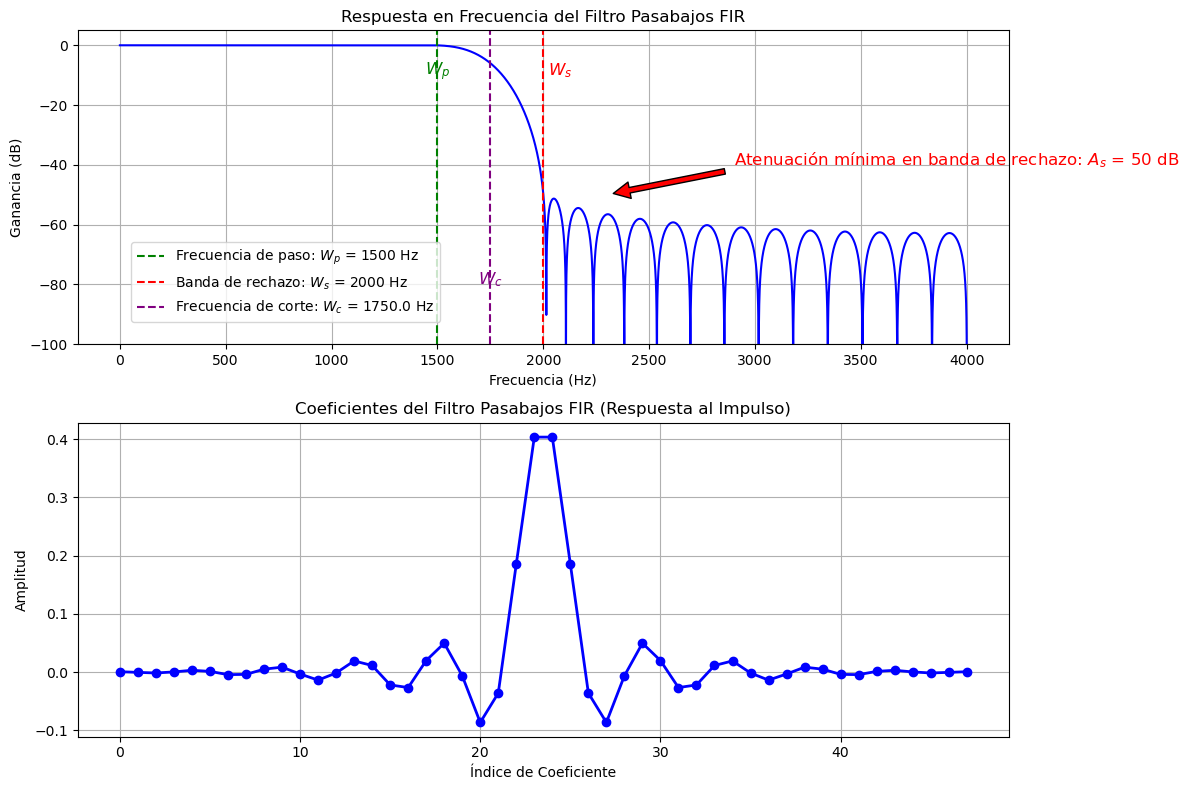

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# Especificaciones del filtro
fs = 8000  # Frecuencia de muestreo (Hz)
f_pass = 1500  # Frecuencia de banda de paso (Hz)
f_stop = 2000  # Frecuencia de banda de rechazo (Hz)
delta_f = f_stop - f_pass  # Ancho de banda de transición (Hz)
attenuation = 50  # Atenuación mínima en banda de rechazo (dB)

# Calcular la frecuencia de corte usando la fórmula Wc = (Wp + Ws) / 2
f_corte = (f_pass + f_stop) / 2

# Normalizar las frecuencias con respecto a la frecuencia de muestreo
nyquist = fs / 2
f_corte_normalizada = f_corte / nyquist

# Calcular el orden del filtro y la beta de la ventana de Kaiser
numtaps, beta = kaiserord(attenuation, delta_f / nyquist)

# Diseñar el filtro FIR pasabajos usando una ventana de Kaiser
fir_coeff = firwin(numtaps, f_corte_normalizada, window=('kaiser', beta))

# Calcular la respuesta en frecuencia del filtro
w, h = freqz(fir_coeff, worN=8000)

# Graficar la respuesta en frecuencia del filtro con etiquetas
plt.figure(figsize=(12, 8))

# Gráfico de la respuesta en frecuencia
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Pasabajos FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.ylim(-100, 5)
plt.grid()

# Añadir líneas y etiquetas a la frecuencia de corte y banda de rechazo
plt.axvline(f_pass, color='green', linestyle='--', label=f'Frecuencia de paso: $W_p$ = {f_pass} Hz')
plt.axvline(f_stop, color='red', linestyle='--', label=f'Banda de rechazo: $W_s$ = {f_stop} Hz')
plt.axvline(f_corte, color='purple', linestyle='--', label=f'Frecuencia de corte: $W_c$ = {f_corte:.1f} Hz')

# Ajustar la posición exacta de los textos en la gráfica
plt.text(f_pass, -10, '$W_p$', color='green', fontsize=12, ha='center')
plt.text(f_stop + 80, -10, '$W_s$', color='red', fontsize=12, ha='center')
plt.text(f_corte, -80, '$W_c$', color='purple', fontsize=12, ha='center')

# Ajustar la posición de la anotación de la atenuación mínima
plt.annotate('Atenuación mínima en banda de rechazo: $A_s$ = 50 dB', 
             xy=(f_stop + 300, -50), xytext=(f_stop + 900, -40),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Leyenda en la gráfica de respuesta en frecuencia
plt.legend(loc='lower left', fontsize=10, bbox_to_anchor=(0.05, 0.05))

# Graficar la respuesta al impulso del filtro
plt.subplot(2, 1, 2)
plt.plot(fir_coeff, 'bo-', linewidth=2)
plt.title('Coeficientes del Filtro Pasabajos FIR (Respuesta al Impulso)')
plt.xlabel('Índice de Coeficiente')
plt.ylabel('Amplitud')
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()
